<a href="https://colab.research.google.com/github/Anshad-Aziz/PRODIGY_ML_01/blob/main/Task2_K_means_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import pandas as pd
import seaborn as sns

In [6]:
cust=pd.read_csv('Mall_Customers.csv')

In [7]:
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
print('check for null Values:\n',cust.isnull().sum())

check for null Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [11]:
print('Check for duplicated:',cust.duplicated().sum())

Check for duplicated: 0


In [12]:
X=cust.copy()

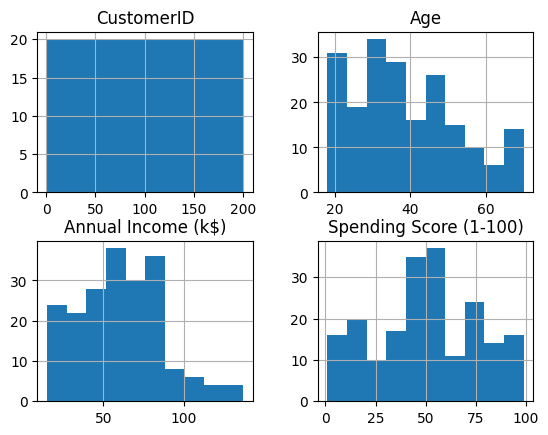

In [14]:
X.hist()
plt.show()

In [15]:
val_cnt=pd.value_counts(X['Gender'])
print(val_cnt)

Female    112
Male       88
Name: Gender, dtype: int64


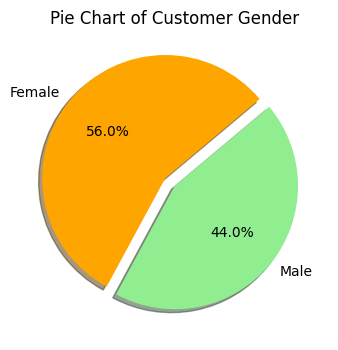

In [16]:
plt.figure(figsize=(4,4))
plt.title('Pie Chart of Customer Gender')
plt.pie(val_cnt,labels=["Female","Male"],autopct='%1.1f%%',shadow=True,
        colors=['orange','lightgreen'],explode=[0.1,0],startangle=40)
plt.show()

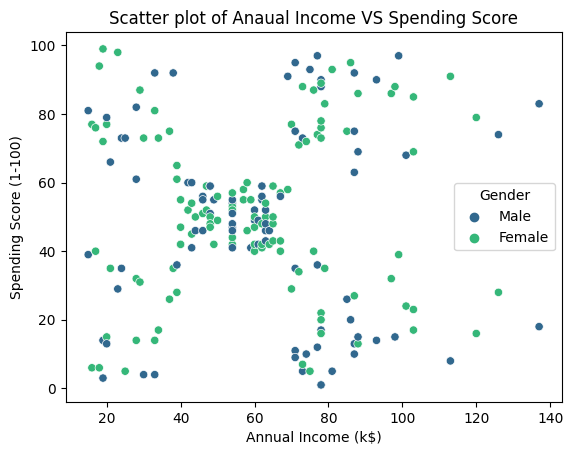

In [17]:
plt.title('Scatter plot of Anaual Income VS Spending Score')
sns.scatterplot(x=X['Annual Income (k$)'],y=X['Spending Score (1-100)'],
                hue=X['Gender'],palette='viridis')
plt.show()

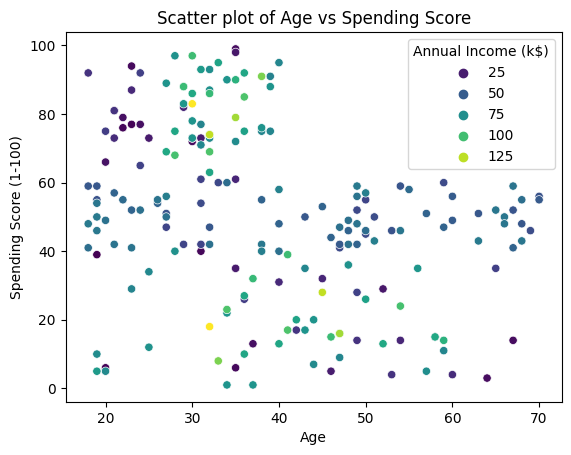

In [18]:
plt.title("Scatter plot of Age vs Spending Score")
sns.scatterplot(x= X["Age"], y=X["Spending Score (1-100)"],
                hue=X["Annual Income (k$)"], palette="viridis")
plt.show()

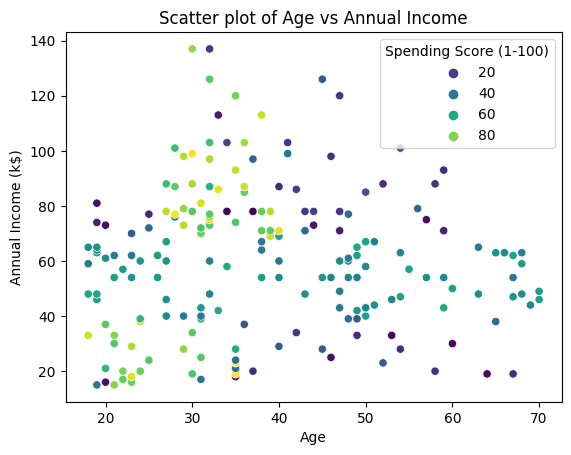

In [19]:
plt.title("Scatter plot of Age vs Annual Income")
sns.scatterplot(x= X["Age"], y=X["Annual Income (k$)"],
                hue=X["Spending Score (1-100)"], palette="viridis")
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [21]:
X.drop('CustomerID',axis=1,inplace=True)

In [23]:
encoder=LabelEncoder()
X['Gender']=encoder.fit_transform(X['Gender'])

In [25]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [26]:
X=pd.DataFrame(X,columns=cust.columns.drop('CustomerID'))
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


In [27]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
class PerformKMeans:

    def __init__(self, X) -> None:
        self.X = X

    def get_cost_func(self, fit_cols, no_k = 10):

        # record inertia values in a list
        cost_function_values = []
        for k in range(1,no_k+1):
            # get k_means algorithm
            km = KMeans(n_clusters=k, init='random', max_iter=100, n_init=1,
                    algorithm = 'lloyd', verbose=False, random_state=9)

            # fit
            dataset = self.X.loc[:,fit_cols]
            km.fit_predict(dataset)

            # get inertia
            inertia = km.inertia_
            cost_function_values.append(inertia)

        return cost_function_values

    def elbow_plot(self, cols, knos=10):
        cost_function = self.get_cost_func(cols, knos)
        plt.figure(figsize=(7,4))
        if len(cols) == 3:
            plt.title("Elbow plot for kmeans with {} , {}, {} columns".format(cols[0], cols[1], cols[2]))
        else:
            plt.title("Elbow plot for kmeans with {} and {}".format(cols[0],cols[1]))
        plt.plot(range(1,knos+1), cost_function, marker='o', linewidth=2, markersize=5)
        plt.xlabel("Number of clusters")
        plt.ylabel("Cost function")
        plt.grid()
        plt.show()

    def plot_clusters(self, fit_cols, k=5):

        if len(fit_cols) != 2:
            raise Exception("clusters can be plotted only for 2 features using this fucntion")

        # get k_means algorithm
        km = KMeans(n_clusters=k, init='random', max_iter=100, n_init=1,
                    algorithm = 'lloyd', verbose=False, random_state=9)

        # fit
        dataset = self.X.loc[:,fit_cols]
        labels = km.fit_predict(dataset)
        centers = km.cluster_centers_

        # plot
        import matplotlib.pyplot as plt
        plt.title("Scatter plot for kmeans with {} vs {}".format(fit_cols[0],fit_cols[1]))
        sns.scatterplot(x= self.X.loc[:,fit_cols[0]], y= self.X.loc[:,fit_cols[1]],
                hue = labels, palette= "viridis")
        sns.scatterplot(x=centers[:,0], y=centers[:,1], color = 'red')
        plt.show()

        return dataset, labels

In [28]:
pkm = PerformKMeans(X)
feature_set1 = X.columns.drop(["Age","Gender"])
feature_set2 = X.columns.drop(["Gender", "Spending Score (1-100)"])
feature_set3 = X.columns.drop(["Gender", "Annual Income (k$)"])
feature_set4 = X.columns.drop(["Gender"])

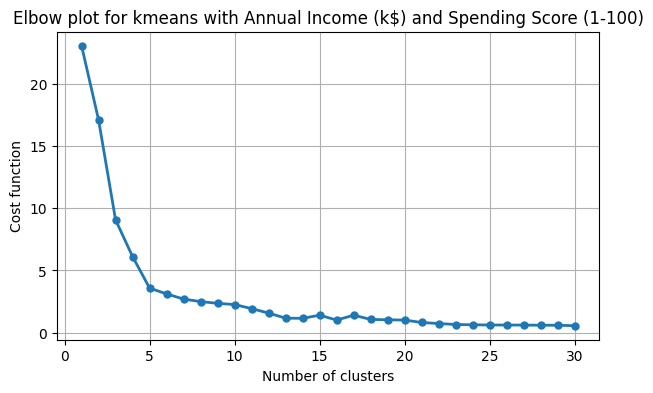

In [29]:
pkm.elbow_plot(feature_set1, knos=30)

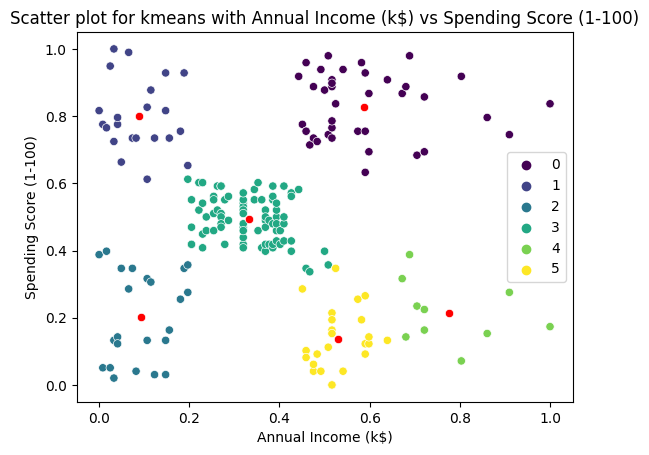

In [30]:
dataset1, labels1 = pkm.plot_clusters(feature_set1, k=6)

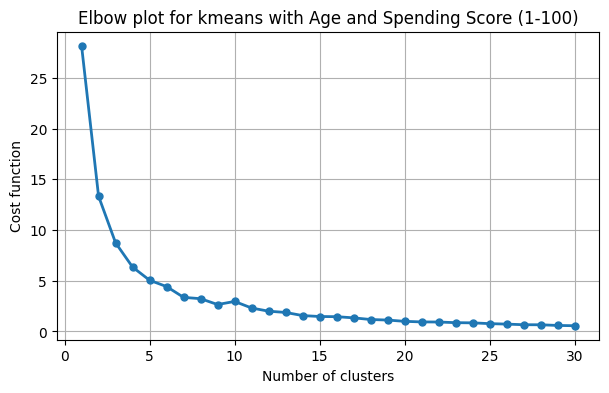

In [31]:
pkm.elbow_plot(feature_set3, knos=30)

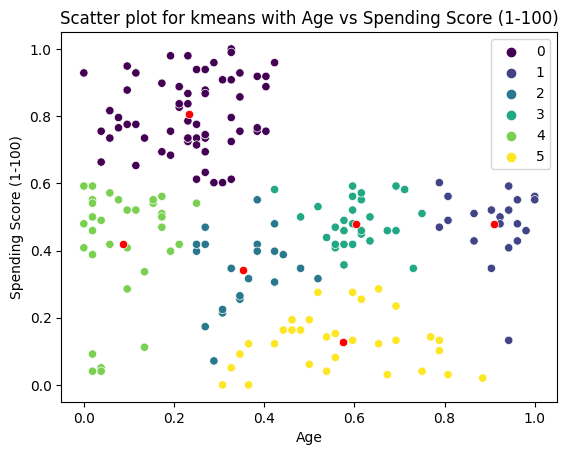

In [32]:
dataset2, labels2 = pkm.plot_clusters(feature_set3, k=6)

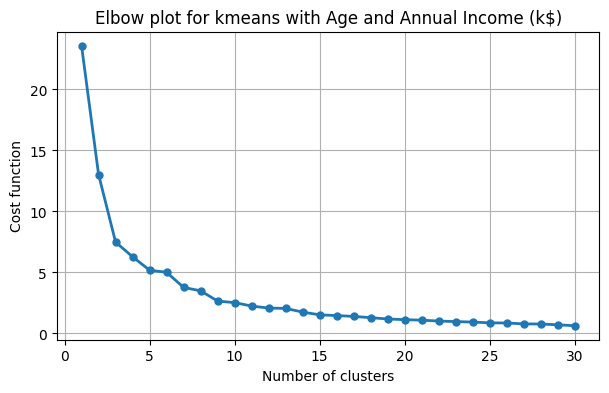

In [33]:
pkm.elbow_plot(feature_set2, knos=30)

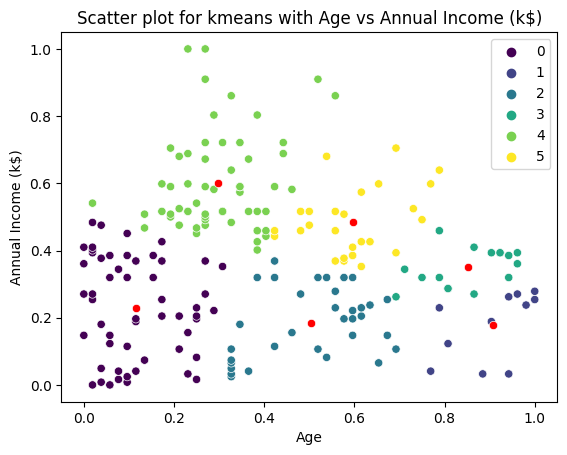

In [34]:
dataset3, labels3 = pkm.plot_clusters(feature_set2, k=6)

In [35]:
dataset1["label"]=labels1
dataset1

,Annual Income (k$),Spending Score (1-100),label
0,0.000000,0.387755,2
1,0.000000,0.816327,1
2,0.008197,0.051020,2
3,0.008197,0.775510,1
4,0.016393,0.397959,2
...,...,...,...
195,0.860656,0.795918,0
196,0.909836,0.275510,4
197,0.909836,0.744898,0
198,1.000000,0.173469,4
